# Machine learning de 0 a 1

#### FLiSOL 2018 / FURB - Blumenau, SC
##### Júlio César Batista [@ejuliobatista](https://twitter.com/ejuliobatista), [@ejulio](https://github.com/ejulio)
##### 27/04/2018

![Tipos de machine learning](./images/machine-learning.png)

# Um pipeline simplificado para aprendizado supervisionado

![Pipeline simplificado para machine learning](./images/pipeline.png)

# Anatomia dos dados

![Dados](./images/data.png)

# Sobre os dados que vamos utilizar

Iris, disponível em https://archive.ics.uci.edu/ml/datasets/Iris

Descrição das colunas:
* sepal length in cm 
* sepal width in cm 
* petal length in cm 
* petal width in cm 
* class: 
    * Iris Setosa 
    * Iris Versicolour 
    * Iris Virginica

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics

In [2]:
# para facilitar com a imagem acima, utilizei colunas com nomes x0, x1, x2, ..., xM
# deveriam ser nomes reais como sepal length, sepal width, ..., class
columns = ['x%d' % i for i in range(5)]
data = pd.read_csv('./data/iris.data', header=None, delimiter=',', names=columns)
data.head(10)

,x0,x1,x2,x3,x4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
X = data[['x0', 'x1', 'x2', 'x3']].as_matrix()
print(X[:10, :])

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]


In [4]:
y = data['x4'].as_matrix()
y[:10]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

In [5]:
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

print(le.classes_)
print(y[:10])

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[0 0 0 0 0 0 0 0 0 0]


![Separação em treino x teste](./images/train-test.png)

In [6]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

112 38 112 38


In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
y_hat = model.predict(X_test)
print('Accuracy', metrics.accuracy_score(y_test, y_hat))
print(y_test)
print(y_hat)

Accuracy 1.0
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


![Logistic Regression](./images/logistic-regression.png)
Fonte: http://www.saedsayad.com/logistic_regression.htm

# Sobre os dados que vamos utilizar

Iris, disponível em https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

Descrição das colunas:
* instant: record index
* dteday : date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* hr : hour (0 to 23)
* holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit : 
    * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are divided to 41 (max)
* atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

In [10]:
data = pd.read_csv('./data/bike-sharing.csv', delimiter=',')
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [11]:
X = data[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']].as_matrix()
print(X[:10, :])

[[  3.44167000e-01   3.63625000e-01   8.05833000e-01   1.60446000e-01
    3.31000000e+02   6.54000000e+02]
 [  3.63478000e-01   3.53739000e-01   6.96087000e-01   2.48539000e-01
    1.31000000e+02   6.70000000e+02]
 [  1.96364000e-01   1.89405000e-01   4.37273000e-01   2.48309000e-01
    1.20000000e+02   1.22900000e+03]
 [  2.00000000e-01   2.12122000e-01   5.90435000e-01   1.60296000e-01
    1.08000000e+02   1.45400000e+03]
 [  2.26957000e-01   2.29270000e-01   4.36957000e-01   1.86900000e-01
    8.20000000e+01   1.51800000e+03]
 [  2.04348000e-01   2.33209000e-01   5.18261000e-01   8.95652000e-02
    8.80000000e+01   1.51800000e+03]
 [  1.96522000e-01   2.08839000e-01   4.98696000e-01   1.68726000e-01
    1.48000000e+02   1.36200000e+03]
 [  1.65000000e-01   1.62254000e-01   5.35833000e-01   2.66804000e-01
    6.80000000e+01   8.91000000e+02]
 [  1.38333000e-01   1.16175000e-01   4.34167000e-01   3.61950000e-01
    5.40000000e+01   7.68000000e+02]
 [  1.50833000e-01   1.50888000e-01  

In [12]:
y = data['cnt'].as_matrix()
y[:10]

array([ 985,  801, 1349, 1562, 1600, 1606, 1510,  959,  822, 1321], dtype=int64)

In [13]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
y_hat = model.predict(X_test)
print('MSE', metrics.mean_squared_error(y_test, y_hat))
print(y_test)
print(y_hat)

MSE 3.84126587694e-24
[6606 1550 3747 6041 7538 7264 1605 2209 7499 5743 1796 3068 4891 5260 2133
 2471 2046 8156 5362 2298 7697 5463 5409 1872 1807 5130 2121 7436 3830 5557
 2743 3644 6196 7494 5918 3372 7582 6053 2566 1263 3944 3956 7580 4906 6966
  705 4458 5298 6043 4996 3351 2431 1011 4475 4725 4727 2395 3351 4788 7175
 6153 7442 1471 7865 6530 6211 7403 4302 2077 7333 3117 1635 3811 4595 4363
 2034 5686 4748 1416 4401 2114 2028 5668   22 3940 4118 5423 1495 3620 3403
 1501 7040 5992 4990 3095 2832 4713 2368 3409 4991 7713 3785 6664 2496 2077
 5267 1162 2739 6861 1360 4602 7282 3570 8167 6230 4511 1461 3272 5923 2177
 6398 1817 3239 1349 3867 5146 4541 3368 2134 7410 3331 3974 5495 5319 5895
 2227 4367 7460 1977 4266 4864 1913 2132 4258 2792 5180 3958 4094 1842 3614
 4274 7335 4123 4576 1510 3520 4151 6779 2424 4677 6233 4105 4205 5323 1746
 3204 6192 1969 3613 4390 7006 7148 1985 3831 4569 5585 4916 5823 4189 1865
 1107 7055 7534]
[ 6606.  1550.  3747.  6041.  7538.  7264.  1605.

In [16]:
# model.coef_

In [17]:
X_train = X_train[:, :-2]
X_test = X_test[:, :-2]
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
y_hat = model.predict(X_test)
print('MSE', metrics.mean_squared_error(y_test, y_hat))
print(y_test)
print(y_hat)

MSE 2258776.19145
[6606 1550 3747 6041 7538 7264 1605 2209 7499 5743 1796 3068 4891 5260 2133
 2471 2046 8156 5362 2298 7697 5463 5409 1872 1807 5130 2121 7436 3830 5557
 2743 3644 6196 7494 5918 3372 7582 6053 2566 1263 3944 3956 7580 4906 6966
  705 4458 5298 6043 4996 3351 2431 1011 4475 4725 4727 2395 3351 4788 7175
 6153 7442 1471 7865 6530 6211 7403 4302 2077 7333 3117 1635 3811 4595 4363
 2034 5686 4748 1416 4401 2114 2028 5668   22 3940 4118 5423 1495 3620 3403
 1501 7040 5992 4990 3095 2832 4713 2368 3409 4991 7713 3785 6664 2496 2077
 5267 1162 2739 6861 1360 4602 7282 3570 8167 6230 4511 1461 3272 5923 2177
 6398 1817 3239 1349 3867 5146 4541 3368 2134 7410 3331 3974 5495 5319 5895
 2227 4367 7460 1977 4266 4864 1913 2132 4258 2792 5180 3958 4094 1842 3614
 4274 7335 4123 4576 1510 3520 4151 6779 2424 4677 6233 4105 4205 5323 1746
 3204 6192 1969 3613 4390 7006 7148 1985 3831 4569 5585 4916 5823 4189 1865
 1107 7055 7534]
[ 4354.40891929  2363.20383844  3271.03471905  4071.5

# Explorando outros modelos

In [19]:
columns = ['x%d' % i for i in range(5)]
data = pd.read_csv('./data/iris.data', header=None, delimiter=',', names=columns)
X = data[['x0', 'x1', 'x2', 'x3']].as_matrix()
y = data['x4'].as_matrix()
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

print('Accuracy', metrics.accuracy_score(y_test, y_hat))
print(y_test)
print(y_hat)

Accuracy 1.0
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


![Nearest neighbor](./images/knn.png)
Fonte:https://www.python-course.eu/k_nearest_neighbor_classifier.php

In [21]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

print('Accuracy', metrics.accuracy_score(y_test, y_hat))
print(y_test)
print(y_hat)

Accuracy 1.0
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


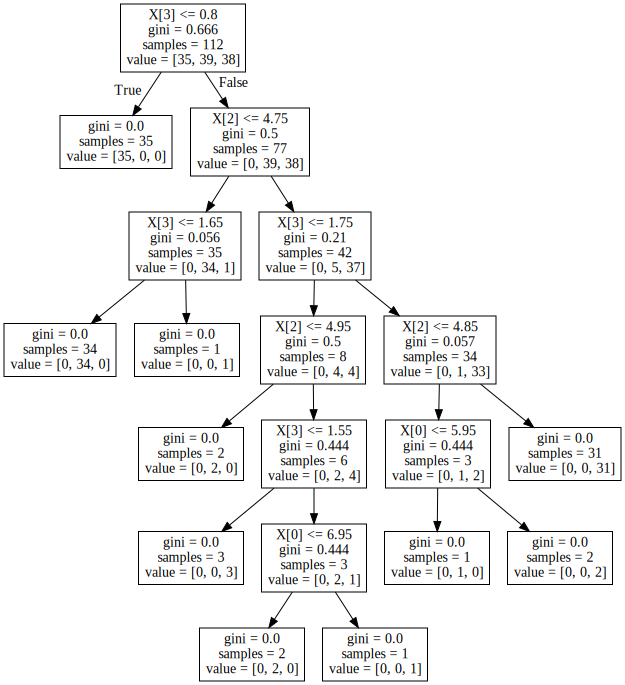

In [24]:
% matplotlib inline
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [ ]:
# e muitos outros....

# Implementando Logistic Regression

In [41]:
columns = ['x%d' % i for i in range(5)]
data = pd.read_csv('./data/iris.data', header=None, delimiter=',', names=columns)
X = data[['x0', 'x1', 'x2', 'x3']].as_matrix()
y = data['x4'].as_matrix()
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25, random_state=42)

In [42]:
# removemos uma classe para "facilitar"
# Logistic Regression é um classificador binário, apenas consegue decidir entre 2 classes (0 e 1)

indices = y_train != 2
X_train = X_train[indices]
y_train = y_train[indices]

indices = y_test != 2
X_test = X_test[indices]
y_test = y_test[indices]

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [61]:
import autograd.numpy as np
from autograd import grad

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def logistic_predictions(weights, inputs):
    return sigmoid(np.dot(inputs, weights))

def training_loss(weights):
    preds = logistic_predictions(weights, X_train_norm)
    label_probabilities = preds * y_train + (1 - preds) * (1 - y_train)
    return -np.sum(np.log(label_probabilities))

training_gradient_fun = grad(training_loss)

weights = np.random.normal(size=(X_train_norm.shape[1], 1), loc=0, scale=0.0001)
for i in range(100):
    print("loss at %d:" % i, training_loss(weights))
    weights -= training_gradient_fun(weights) * 0.00001

print("Trained loss:", training_loss(weights))

loss at 0: 3795.67403636
loss at 1: 3795.67403085
loss at 2: 3795.67402576
loss at 3: 3795.67402108
loss at 4: 3795.67401676
loss at 5: 3795.67401277
loss at 6: 3795.6740091
loss at 7: 3795.67400571
loss at 8: 3795.67400258
loss at 9: 3795.6739997
loss at 10: 3795.67399703
loss at 11: 3795.67399458
loss at 12: 3795.67399231
loss at 13: 3795.67399021
loss at 14: 3795.67398827
loss at 15: 3795.67398648
loss at 16: 3795.67398482
loss at 17: 3795.67398329
loss at 18: 3795.67398188
loss at 19: 3795.67398057
loss at 20: 3795.67397935
loss at 21: 3795.67397823
loss at 22: 3795.67397719
loss at 23: 3795.67397623
loss at 24: 3795.67397533
loss at 25: 3795.6739745
loss at 26: 3795.67397373
loss at 27: 3795.67397302
loss at 28: 3795.67397236
loss at 29: 3795.67397174
loss at 30: 3795.67397117
loss at 31: 3795.67397063
loss at 32: 3795.67397014
loss at 33: 3795.67396967
loss at 34: 3795.67396924
loss at 35: 3795.67396884
loss at 36: 3795.67396847
loss at 37: 3795.67396811
loss at 38: 3795.67396779